<a href="https://colab.research.google.com/github/Labo-Lacourse/Code_chap_23_logistic_regression_regularization/blob/master/Analysis_(Colab_R_magic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Do not forget to connect yourself to the execution environment.

# Machine learning algorithms and statistical models
## An example of regularization and cross validation in logistic regression to predict high school dropout in Quebec
## Code of analysis presented in part 2 of chapter 23 : regularized logistic regression
###In M. Corbière & N. Larivière (Eds.), Qualitative, quantitative and mixed methods in human, social and health science research, 2nd edition. Québec, QC : PUQ.
Contact: eric.lacourse@umontreal.ca
### Authors: Éric Lacourse, Charles-Édouard Giguère et Véronique Dupéré
#### Analyst: Charles-Édouard Giguère
#### Code transcription: Clémentine Courdi
Cite as: Lacourse, E., Giguère, C.E., & Dupéré, V. (under press). Algorithmes d’apprentissage et modèles statistiques: Un exemple de régression logistique régularisée et de validation croisée pour prédire le décrochage scolaire. In M. Corbière & N. Larivière (Eds.), Méthodes qualitatives, quantitatives et mixtes dans la recherche en sciences humaines, sociales et de la santé, 2nd edition. Québec, QC : PUQ.




###2.1 Description of sample, research goal and variables

2.1.1 Sample

The data was initially collected from n = 6773 teenagers from 12 schools where the dropout rate is particularly high, around 36%, as to measure a set of risk factors associated to high school dropout. In total, ten out of twelve schools where located in economically disadvantaged neighbourhoods. A subsample was then invited to complete an interview in order to establish the stressors to which teenagers were exposed. The goal was to interview 45 teenagers by school (for a total of n = 545), following a plan with paired control cases. First, 15 students who had just dropped out of school were interviewed. Then, 15 paired students with a similar initial risk profile, but who were still in school, were also interviewed. Finally, 15 “normative” students, also still in school, with an average risk profile, were interviewed.

2.1.2 Variables

The dependent variable is a dichotomic variable (coded 0 = no / 1 = yes) representing the fact that a student dropped out of school or not. A student is considered to have dropped out if he fulfills at least one of the following conditions: 1) having officially notified the school of a cessation of studies before obtaining a high school diploma, 2) having been transferred to the adult education system, 3) being absent from school for over a month without notifying the school direction of underlying motivations. For more details on variables and research methodology, see the original article by Dupéré & al. (2018). A specificity in the data structure if that the vast majority of variables are ordinals and were thus recoded in binary dummy variables. In general, the effects of regulation are more important: 1) with interval/ratio variables since they have a larger variance and 2) in presence of multicollinearity. Another characteristic of the data used here is that we are not in context of high dimensions since we have 25 variables for 1000 observations (p < n). Lastly, the original study was confirmatory in nature (hypothetical deductive) and not exploratory (inductive), which favours least flexible algorithms like the “classical” logistic regression.


Description of independent variables introduced in the regularized logistic regression model from the study by Dupéré & al. (2018)

Variable name -	Variable type -	Variable name in the data file

1.	Sex	- Dichotomous -	MALE
2.	Age	-	Interval -	AGE
3.	Immigrated parent	-	Dichotomous	-	PAR_IMM
4.	Ethnicity	-	Dichotomous	-	MINORITY
5.	Parents’ education level	-	Interval	-	SCOLMAX
6.	Employed mother 	-	Dichotomous	-	TRAVAILM
7.	Employed father	-	Dichotomous	-	TRAVAILP
8.	Separated parents	-	Dichotomous	-	PAR_SEP
9.	School adaptation	-	Interval	-	ADAPT
10.	Dropout risk	-	Interval	-	SRDQ
11.	Severe chronic difficulties	-	Interval	-	CHRONSEVACT
12.	Severe stressors 0-3 months	-	Dichotomous	-	SEVER03DICO
13.	Severe stressors 3-6 months	-	Dichotomous	-	SEVER36DICO
14.	Severe stressors 6-9 months	-	Dichotomous	-	SEVER69DICO
15.	Severe stressors 9-12 months	-	Dichotomous	-	SEVER912DICO
16.	Moderate stressors 0-3 months	-	Dichotomous	-	MODER203DICO
17.	Moderate stressors 3-6 months	-	Dichotomous	-	MODER236DICO
18.	Moderate stressors 6-9 months	-	Dichotomous	-	MODER269DICO
19.	Moderate stressors 9-12 months	-	Dichotomous	-	MODER2912DICO
20.	Mild stressors 0-3 months	-	Dichotomous	-	LOW203DICO
21.	Mild stressors 3-6 months	-	Dichotomous	-	LOW236DICO
22.	Mild stressors 6-9 months	-	Dichotomous	-	LOW269DICO
23.	Mild stressors 9-12 months	-	Dichotomous	-	LOW2912DICO
24.	Severe distal stressors	-	Interval/ratio	-	EVDISTSEV
25.	Moderate distal stressors	-	Interval/ratio	-	EVDISTMOD


###2.2 Analysis’ objectives

The main goal of this analysis is to select a model of logistic regression, in an exploratory/inductive manner, by using technics that are specific to machine learning in order to potentially predict high school dropout with the highest predictive accuracy possible from the 25 independent variables. We use data that was simulated from the original sample. 

In summary, the classification task consists in finding both the optimal number of predictors of high school dropout and the algorithm of regularization that will give the best model adjustment to the data, considering the specificity of the variables introduced in this model.


###2.3 & 2.4 Regularized logistic regression: model and procedures + interpretations and result tables

The rest of this document presents the code used (originally in RStudio) for model selection according to the procedures described in section 2.3 and the results presented in section 2.4 of the chapter.


In [ ]:
# Activate R magic to use R code in Colab
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
#Download the data from Github
!git clone https://github.com/ericlacourse/
Code_chap_23_logistic_regression_regularization.git

fatal: destination path '23Rcode' already exists and is not an empty directory.


In [ ]:
#Read data file downloaded from  github
import pandas as pd
SD = pd.read_csv('Code-chapitre-23/SD.csv') 
print(SD.head(5))

   Unnamed: 0  ID  ECOLE  ...  LOW269DICO  LOW2912DICO  CHRONSEVACT
0         367   1     14  ...           0            0            0
1         368   2     14  ...           1            1            1
2         369   3     14  ...           1            1            0
3         370   4     14  ...           1            1            0
4         371   5     14  ...           0            0            1

[5 rows x 36 columns]


In [ ]:
%%R #Activate R code for the cell

#Download packages for analysis
install.packages("CUFF") #Package CUFF (Charles's Utility Function using Formula) for variable presentation
install.packages ("dplyr") #Package dplyr for data manipulation
install.packages("ggplot2")#Package ggplot2 for graphic creation
install.packages("haven") #Package haven for data importation
install.packages("knitr") #Package knitr for table production
install.packages("xtable") #Package xtable for table production
install.packages("pairwise") #Package xtable for table production

require(dplyr, quietly = TRUE, warn.conflicts = FALSE) 
require(ggplot2, quietly = TRUE, warn.conflicts = FALSE) 
require(CUFF, quietly = TRUE, warn.conflicts = FALSE) 
require(haven, quietly = TRUE, warn.conflicts = FALSE)
require(knitr, quietly = TRUE, warn.conflicts = FALSE)
require(xtable, quietly = TRUE, warn.conflicts = FALSE)

opts_chunk$set(echo = TRUE, prompt = TRUE, comment = "", cache = TRUE)
options(xtable.comment = FALSE)


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/CUFF_1.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 18524 bytes (18 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to co

In [ ]:
%%R

install.packages("glmnet") #Package for regularization analysis
install.packages("latex2exp") #Package for regularization analysis

require(glmnet)
require(latex2exp)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/glmnet_4.0-2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2126902 bytes (2.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [ ]:
%%R 

#Read file from github (checking packages)
library(readr)
SD.df <- read_csv("Code-chapitre-23/SD.csv")
ls(SD.df)

R[write to console]: Parsed with column specification:
cols(
  .default = col_double()
)

R[write to console]: See spec(...) for full column specifications.



 [1] "ADAPT"         "AGE"           "AIMES"         "AMB"          
 [5] "CHRONSEVACT"   "DOUBLE"        "ECOLE"         "EVDISTMOD"    
 [9] "EVDISTSEV"     "ID"            "IMP"           "LOW203DICO"   
[13] "LOW236DICO"    "LOW269DICO"    "LOW2912DICO"   "MALE"         
[17] "MINORITY"      "MODER203DICO"  "MODER236DICO"  "MODER269DICO" 
[21] "MODER2912DICO" "NOTES_FR"      "NOTES_MATH"    "PAR_IMM"      
[25] "PAR_SEP"       "PR_AUTRES"     "SCOLMAX"       "SEVER03DICO"  
[29] "SEVER36DICO"   "SEVER69DICO"   "SEVER912DICO"  "SRDQ"         
[33] "STATUT"        "TRAVAILM"      "TRAVAILP"      "X1"           


###Models development from the training sample

We seek to avoid under- and over-adjustment of the model, meaning that we get an excellent classification with the training set, but a bad classification with new data. A solution to avoid this problem is to randomly divide the sample in two parts, 70% for the training data and 30% for the testing data (new data) This proportion is arbitrary, but the idea behind it is to keep the training set as large as possible to develop a good model while leaving enough testing data to validate it.

Thus, the sample is separated in two subsamples:
1. Training set (TRAIN.df ; N = 700) 
2. Testing set (TEST.df ; N = 300)


In [ ]:
%%R 

#Divide the sample in two subsamples
set.seed(1234)
ECH.TRAIN <- sample(1:1000, 700)
TRAIN.df <- SD.df[ECH.TRAIN,]
TEST.df <- SD.df[-ECH.TRAIN,]

In [ ]:
%%R
#Fix subsamples as dataframes
TRAIN.df <- as.data.frame(TRAIN.df)
TEST.df <- as.data.frame(TEST.df)

The variables of both data files are centered and standardized except the three first variables: ID, ECOLE (school), and STATUT.

In [ ]:
%%R

#Variables' standardization
TRAIN.df[,-(2:4)]  <- scale(TRAIN.df[,-(2:4)])
TEST.df[,-(2:4)]  <- scale(TEST.df[,-(2:4)])

In [ ]:
%%R 

#Print the training set
ls (TRAIN.df)

 [1] "ADAPT"         "AGE"           "AIMES"         "AMB"          
 [5] "CHRONSEVACT"   "DOUBLE"        "ECOLE"         "EVDISTMOD"    
 [9] "EVDISTSEV"     "ID"            "IMP"           "LOW203DICO"   
[13] "LOW236DICO"    "LOW269DICO"    "LOW2912DICO"   "MALE"         
[17] "MINORITY"      "MODER203DICO"  "MODER236DICO"  "MODER269DICO" 
[21] "MODER2912DICO" "NOTES_FR"      "NOTES_MATH"    "PAR_IMM"      
[25] "PAR_SEP"       "PR_AUTRES"     "SCOLMAX"       "SEVER03DICO"  
[29] "SEVER36DICO"   "SEVER69DICO"   "SEVER912DICO"  "SRDQ"         
[33] "STATUT"        "TRAVAILM"      "TRAVAILP"      "X1"           


In [ ]:
%%R 

#Print the testing set
ls (TEST.df)

 [1] "ADAPT"         "AGE"           "AIMES"         "AMB"          
 [5] "CHRONSEVACT"   "DOUBLE"        "ECOLE"         "EVDISTMOD"    
 [9] "EVDISTSEV"     "ID"            "IMP"           "LOW203DICO"   
[13] "LOW236DICO"    "LOW269DICO"    "LOW2912DICO"   "MALE"         
[17] "MINORITY"      "MODER203DICO"  "MODER236DICO"  "MODER269DICO" 
[21] "MODER2912DICO" "NOTES_FR"      "NOTES_MATH"    "PAR_IMM"      
[25] "PAR_SEP"       "PR_AUTRES"     "SCOLMAX"       "SEVER03DICO"  
[29] "SEVER36DICO"   "SEVER69DICO"   "SEVER912DICO"  "SRDQ"         
[33] "STATUT"        "TRAVAILM"      "TRAVAILP"      "X1"           


Next the training sample is randomly divided into ten subsamples of 70 units each to allow for 10-fold cross validation and selection of the alpha and lambda parameter for regularization. 

In [ ]:
%%R

#The partitions and crossval function are built for cross validation procedures
#Division of training data into 10 subsamples of 70 units
PARTITION = sample(rep(1:10, rep(70,10)),700)

crossval <- function(mod){
    f1 <- function(x){
        modi = update(mod, data = TRAIN.df[!(PARTITION %in% x),])
        table(1*(predict(modi, newdata = TRAIN.df[PARTITION %in% x,],
                         type = "resp")>0.5),
              TRAIN.df[(PARTITION %in% x),"STATUT"])
    }
 CVT <- mapply(f1, x = 1:10)
    as.table(matrix(apply(CVT, 1, sum), 2, 2,
                    dimnames = list(c("P.ND","P.D"),
                                    c("T.ND","T.D"))))
}   

A good way to start the analysis is to estimate a classical logistic regression model using the 25 predictive variables.

In [ ]:
%%R

#Classical logistic regression model is adjusted to the training data
var.model <- c("MALE", "AGE", "PAR_IMM", "MINORITY", "SCOLMAX", "TRAVAILM", "TRAVAILP", "PAR_SEP", "ADAPT",
                "SRDQ", "EVDISTSEV", "EVDISTMOD","SEVER03DICO",
                "SEVER36DICO", "SEVER69DICO", "SEVER912DICO",
                "MODER203DICO", "MODER236DICO", "MODER269DICO",
                "MODER2912DICO", "LOW203DICO", "LOW236DICO",
                "LOW269DICO", "LOW2912DICO", "CHRONSEVACT")
glm1 <- glmnet(x = TRAIN.df[, var.model] %>% as.matrix, y = TRAIN.df[,"STATUT"], lambda=0, family = "binomial")

#Visualize results
print(glm1)
predict(glm1, type="coef", "lambda.min", allCoef = TRUE)



Call:  glmnet(x = TRAIN.df[, var.model] %>% as.matrix, y = TRAIN.df[,      "STATUT"], family = "binomial", lambda = 0) 

  Df  %Dev Lambda
1 25 16.07      0
26 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)    0.01223880
MALE           0.11619607
AGE            0.37832290
PAR_IMM       -0.02354991
MINORITY       0.01117619
SCOLMAX        0.28359589
TRAVAILM       0.11628193
TRAVAILP      -0.10514515
PAR_SEP        0.54567272
ADAPT         -0.12379524
SRDQ          -0.04120007
EVDISTSEV      0.26398912
EVDISTMOD     -0.49879199
SEVER03DICO    0.43484789
SEVER36DICO   -0.06016151
SEVER69DICO   -0.45572581
SEVER912DICO  -0.01289725
MODER203DICO  -0.36817345
MODER236DICO   0.36277321
MODER269DICO   0.44343925
MODER2912DICO  0.09907921
LOW203DICO     0.25546687
LOW236DICO     0.12153723
LOW269DICO    -0.23443896
LOW2912DICO   -0.17378213
CHRONSEVACT    0.60983017


In [ ]:
%%R

#Prediction with classical logistic regression
glm1p <- predict(glm1, newx = TRAIN.df[,var.model] %>%
                  as.matrix, s = "lambda.min")

#Confusion matrix showing the model accuracy (frequency then percent)
(cv0 <- table(1*(glm1p>0),
      TRAIN.df$STATUT)) %>%
ftab()

#Total accuracy
sprintf("%.1f%% de bonne classification", sum(diag(prop.table(cv0)))*100)

        N(%)
        -1.0021446507074 0.996434424777448         Total
  0        245 ( 35.0 %)     105 ( 15.0 %) 350 ( 50.0 %)
  1        104 ( 14.9 %)     246 ( 35.1 %) 350 ( 50.0 %)
  Total    349 ( 49.9 %)     351 ( 50.1 %) 700 (100.0 %)
[1] "70.1% de bonne classification"


We can see that the model has a predictive accuracy of 70,1% when using the training data set for the classical logistic regression model.

Now, let's examine regularization models.

Regularization or penalization consists in the addition of a penalty to the least square regression model to estimate the coefficients. Essentially, it estimates the coefficient while adding a penalty so as to reduce de regression dimension. A least square regression model has p parameters to estimate (number of variables), whereas a regularized regression has a number of degrees of liberty inferior to p, making to model more parsimonious. To estimate the coefficients of a regularized model, we use the following objective function: 

$$
RSS_{shrinkage} = (Y - BX) + \lambda f(B)
$$

We use three methods corresponding to three different penalties:

1. The ridge regularization method uses a quadratic penalty
$$
RSS_{shrinkage} =(Y - BX)+ \lambda \sum_{i=1}^p \ \beta_i^2
$$

2. The LASSO regularization method uses an absolute value penalty
This penalty makes it so that if a coefficient if at 0 for a given $\lambda$, it is fozed at 0 for all $\lambda$* > $\lambda$.
$$
RSS_{shrinkage} = (Y - BX)+\lambda \sum_{i=1}^p \ |\beta_i|
$$

3.The elastic-net regularization method uses a mix of the two last penalties.
This method introduces a new parameter ($\alpha$) to estimate in the model. By using this parameter, we end with $\alpha$ = 0 corresponding to ridge regression, whereas $\alpha$ = 1 corresponds to a LASSO regression. An alpha between those two values  produces a mix of the two penalties.
$$
RSS_{shrinkage} = (Y - BX)+ + (1 - \alpha) ( \sum_{i=1}^p \ \beta_i^2 )  + (\alpha) ( \lambda \sum_{i=1}^p \ |\beta_i|  )
$$





Let’s start by trying ridge regularization. 


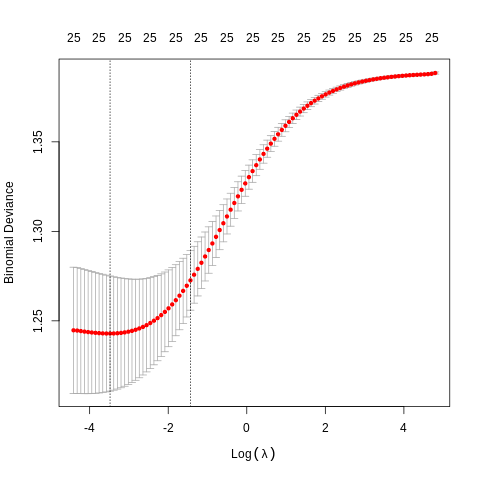

In [ ]:
%%R

##Logistic regression with ridge regularization
#Selection of lambda with 10-fold cross validation

var.model <- c("MALE", "AGE", "PAR_IMM", "MINORITY", "SCOLMAX", "TRAVAILM", "TRAVAILP", "PAR_SEP", "ADAPT",
                "SRDQ", "EVDISTSEV", "EVDISTMOD","SEVER03DICO",
                "SEVER36DICO", "SEVER69DICO", "SEVER912DICO",
                "MODER203DICO", "MODER236DICO", "MODER269DICO",
                "MODER2912DICO", "LOW203DICO", "LOW236DICO",
                "LOW269DICO", "LOW2912DICO", "CHRONSEVACT")

cv.glmn1 <- cv.glmnet(x= TRAIN.df[,var.model] %>% as.matrix,
                      y = TRAIN.df[,"STATUT"], alpha = 0, nfolds = 10, 
                      foldid = PARTITION, intercept= TRUE, 
                      family = "binomial", standardize = TRUE)

#Visualize results (the line shows the optimal lambda value)
plot(cv.glmn1)

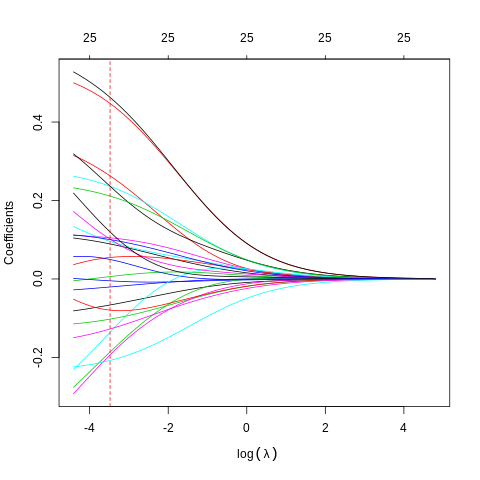

In [ ]:
%%R

##Logistic regression with ridge regularization
glmn1.0 <- glmnet(x = TRAIN.df[, var.model] %>% as.matrix,
                  y = TRAIN.df[,"STATUT"], alpha = 0, family = "binomial")

#Visualize results: coefficient evolution depending on the selected lambda
plot(glmn1.0, xvar = "lambda", label = FALSE, xlab = ~ log(lambda))
abline( v = log(cv.glmn1$lambda.min), col = "red", lty = 2)

Cross-validation was applied to find the lambda parameter. We make a prediction based on this model, but generalization of the prediction based on the model will be confirmed with the testing data set later on.

In [ ]:
%%R

#Prediction from logistic regression with ridge regularization
glmn1p <- predict(cv.glmn1, newx = TRAIN.df[,var.model] %>%
                    as.matrix, s = "lambda.min") 

#Confusion matrix showing the model accuracy (frequency then percent)
(cv2 <- table(1*(glmn1p>0),
      TRAIN.df$STATUT)) %>%
ftab()

#Total accuracy
sprintf("%.1f%% de bonne classification", sum(diag(prop.table(cv2)))*100)

        N(%)
        -1.0021446507074 0.996434424777448         Total
  0        243 ( 34.7 %)     100 ( 14.3 %) 343 ( 49.0 %)
  1        106 ( 15.1 %)     251 ( 35.9 %) 357 ( 51.0 %)
  Total    349 ( 49.9 %)     351 ( 50.1 %) 700 (100.0 %)
[1] "70.6% de bonne classification"


We now go to lasso regularization


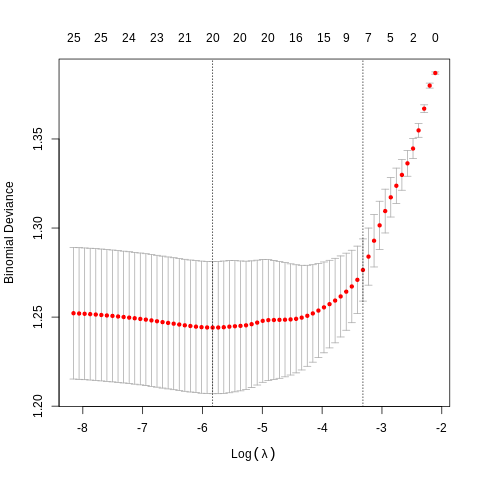

In [ ]:
%%R

##Logistic regression with lasso regularization
#Selection of lambda with 10-fold cross validation
cv.glmn2 <- cv.glmnet(x = TRAIN.df[,var.model] %>% as.matrix,
                    y = TRAIN.df[,"STATUT"], alpha = 1, nfolds = 10,
                    foldid = PARTITION, family = "binomial")

glmn2 <- glmnet(x = TRAIN.df[,var.model] %>%
                as.matrix, y = TRAIN.df[,"STATUT"], alpha = 1, family = "binomial",
                lambda = cv.glmn2$lambda.min)

#Visualize results (the line shows the optimal lambda value)
plot(cv.glmn2)

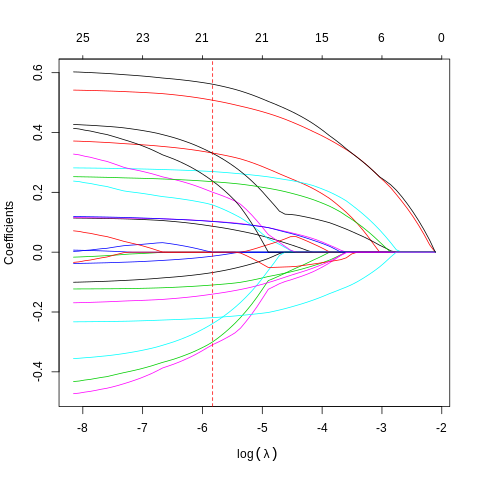

In [ ]:
%%R

##Logistic regression with lasso regularization
glmn2.0 <- glmnet(x = TRAIN.df[,var.model] %>% as.matrix,
                  y = TRAIN.df[,"STATUT"], alpha = 1, family = "binomial")

#Visualize results: coefficient evolution depending on the selected lambda
plot(glmn2.0, xvar = "lambda", label = FALSE, xlab = ~log(lambda))
abline(v = log(cv.glmn2$lambda.min), lty = 2, col = "red")

La validation croisé a été appliquée pour trouver le paramètre λ optimal. On fait une prédiction basée sur ce modèle et on compare au vrai statut de décrochage dans les données d'entrainement.

In [ ]:
%%R

#Prediction from logistic regression with lasso regularization
glmn2p <- predict(cv.glmn2, newx = TRAIN.df[,var.model] %>%
                  as.matrix, s = "lambda.min")

#Confusion matrix showing the model accuracy (frequency then percent)
(cv3 <- table(1*(glmn2p>0),
      TRAIN.df$STATUT)) %>%
ftab()

#Total accuracy
sprintf("%.1f%% de bonne classification", sum(diag(prop.table(cv3)))*100)

        N(%)
        -1.0021446507074 0.996434424777448         Total
  0        242 ( 34.6 %)     104 ( 14.9 %) 346 ( 49.4 %)
  1        107 ( 15.3 %)     247 ( 35.3 %) 354 ( 50.6 %)
  Total    349 ( 49.9 %)     351 ( 50.1 %) 700 (100.0 %)
[1] "69.9% de bonne classification"


We now complete by trying elastic-net regularization, combining the two previous methods. For this last section, we want to find a compromise between ridge and lasso regression. Thus, we need to estimate a new parameter (α ∈ (0, 1)).

In [ ]:
%%R

#Matrix adjustment
layout(matrix(1:10,3,3, byrow = TRUE))

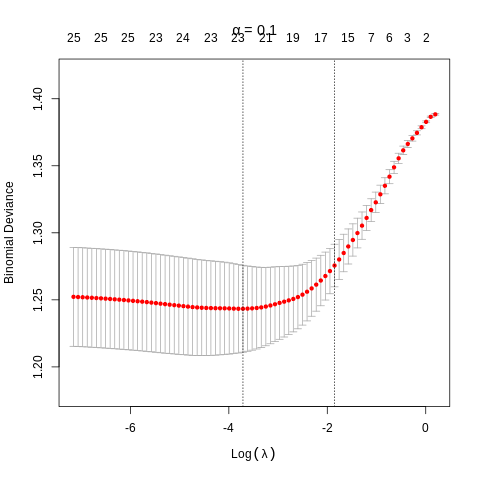

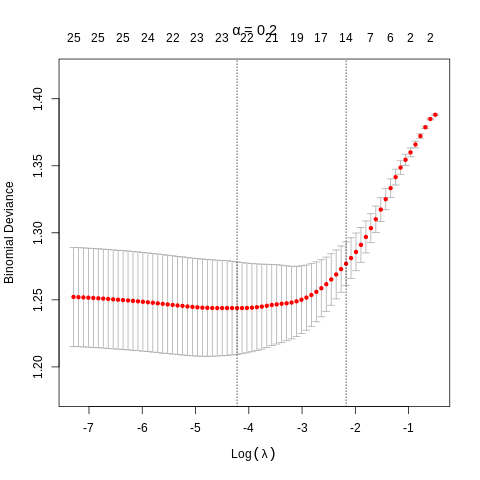

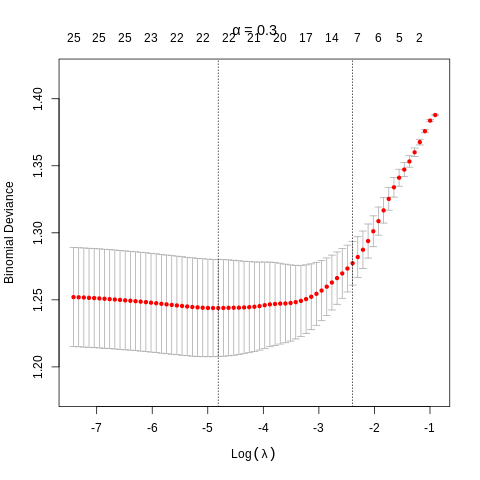

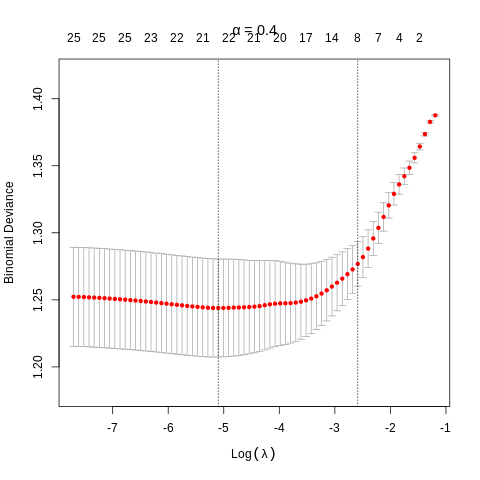

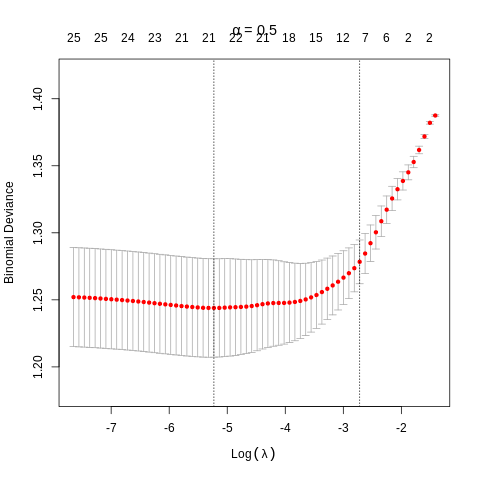

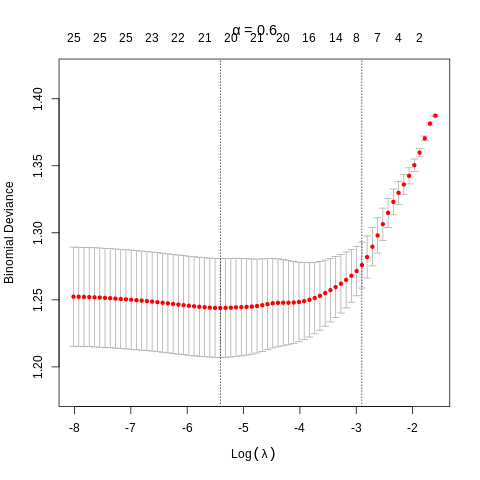

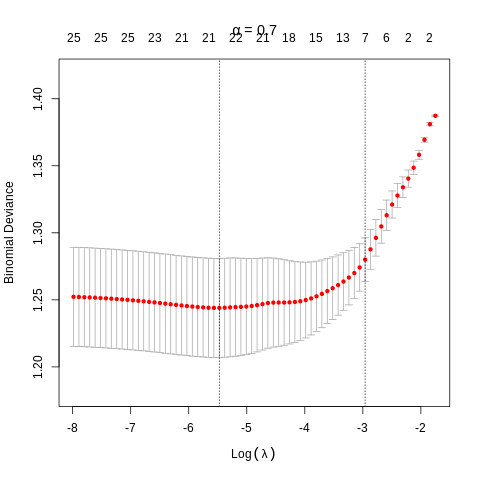

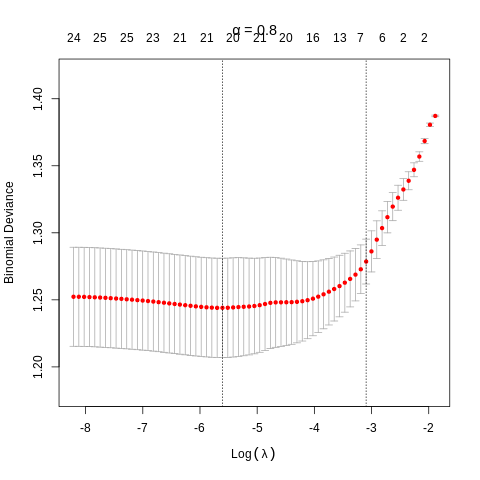

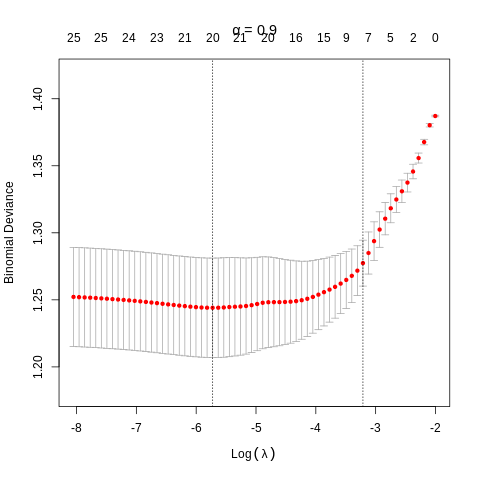

In [ ]:
%%R

#Selection of alpha with 10-fold cross validation
cv.glmn3 <- list()

for(al in seq(0.1,0.9,0.1)){
    cv.glmn3[[sprintf("%.1f",al)]] <-
    cv.glmnet(x = TRAIN.df[,var.model] %>% as.matrix,
    y = TRAIN.df[,"STATUT"], nfolds = 10, foldid = PARTITION,
    alpha = al, family = "binomial")
plot(cv.glmn3[[sprintf("%.1f",al)]],
main = latex2exp::TeX(sprintf("$\\alpha = %.1f$",al)), ylim = c(1.18, 1.42))
}

In [ ]:
%%R

#Summary: optimal lambda for each value of alpha
layout (1)
lapply(cv.glmn3, function(x) c(x$cvm[x$lambda == x$lambda.min],
+ x$cvsd[x$lambda == x$lambda.min]))

$`0.1`
[1] 1.24334596 0.03240747

$`0.2`
[1] 1.24380465 0.03446807

$`0.3`
[1] 1.24387059 0.03614771

$`0.4`
[1] 1.24390553 0.03652575

$`0.5`
[1] 1.24393115 0.03668735

$`0.6`
[1] 1.24394632 0.03684874

$`0.7`
[1] 1.24399564 0.03693823

$`0.8`
[1] 1.24402662 0.03701833

$`0.9`
[1] 1.24406738 0.03707612



In [ ]:
%%R

##Logistic regression with elastic-net regularization
glmn3 <- glmnet(x = TRAIN.df[,var.model] %>% as.matrix,
          y = TRAIN.df[,"STATUT"], alpha = 0.1, family = "binomial",
          lambda = cv.glmn3[[9]]$lambda.min)


In [ ]:
%%R

#Prediction from logistic regression with elastic-net regularization
glmn3p <- predict(cv.glmn3[[9]], newx = TRAIN.df[,var.model] %>% as.matrix)

#Confusion matrix showing the model accuracy (frequency then percent)
(cv4 <- table(1*(glmn3p>0), TRAIN.df$STATUT)) %>%
ftab()

#Total accuracy
sprintf("%.1f%% de bonne classification", sum(diag(prop.table(cv4)))*100)

        N(%)
        -1.0021446507074 0.996434424777448         Total
  0        240 ( 34.3 %)     117 ( 16.7 %) 357 ( 51.0 %)
  1        109 ( 15.6 %)     234 ( 33.4 %) 343 ( 49.0 %)
  Total    349 ( 49.9 %)     351 ( 50.1 %) 700 (100.0 %)
[1] "67.7% de bonne classification"


###Validating models with the testing set

We now take the testing sample and validate our prediction based on the models built with the training sample.


In [ ]:
%%R

#Prediction with testing data
glm1tp <- predict(glm1, newx = TEST.df[,var.model] %>% as.matrix, s = "lambda.min")
glmn1tp <- predict(cv.glmn1, newx = TEST.df[,var.model] %>% as.matrix, s = "lambda.min")
glmn2tp <- predict(cv.glmn2, newx = TEST.df[,var.model] %>% as.matrix, s = "lambda.min")
glmn3tp <- predict(cv.glmn3[[9]], newx = TEST.df[,var.model] %>%as.matrix, s = "lambda.min")

#Confusion matrix showing accuracy of the classical logistic regression model on testing data
(cvt1 <- table(1*(glm1tp>0), TEST.df$STATUT)) %>%
ftab()
sprintf("%.1f%% de bonne classification", sum(diag(prop.table(cvt1)))*100)

        N(%)
        -0.991698433831807 1.00500982220539         Total
  0          100 ( 33.3 %)     49 ( 16.3 %) 149 ( 49.7 %)
  1           51 ( 17.0 %)    100 ( 33.3 %) 151 ( 50.3 %)
  Total      151 ( 50.3 %)    149 ( 49.7 %) 300 (100.0 %)
[1] "66.7% de bonne classification"


In [ ]:
%%R

#Confusion matrix showing accuracy of the logistic regression with ridge regularization model on testing data
(cvt2 <- table(1*(glmn1tp>0),
TEST.df$STATUT)) %>% ftab()
sprintf("%.1f%% de bonne classification", sum(diag(prop.table(cvt2)))*100)

        N(%)
        -0.991698433831807 1.00500982220539         Total
  0          100 ( 33.3 %)     49 ( 16.3 %) 149 ( 49.7 %)
  1           51 ( 17.0 %)    100 ( 33.3 %) 151 ( 50.3 %)
  Total      151 ( 50.3 %)    149 ( 49.7 %) 300 (100.0 %)
[1] "66.7% de bonne classification"


In [ ]:
%%R

#Confusion matrix showing accuracy of the logistic regression with lasso regularization model on testing data
(cvt3 <- table(1*(glmn2tp>0),
TEST.df$STATUT)) %>%  ftab()
sprintf("%.1f%% de bonne classification", sum(diag(prop.table(cvt3)))*100)

        N(%)
        -0.991698433831807 1.00500982220539         Total
  0          101 ( 33.7 %)     49 ( 16.3 %) 150 ( 50.0 %)
  1           50 ( 16.7 %)    100 ( 33.3 %) 150 ( 50.0 %)
  Total      151 ( 50.3 %)    149 ( 49.7 %) 300 (100.0 %)
[1] "67.0% de bonne classification"


In [ ]:
%%R

#Confusion matrix showing accuracy of the logistic regression with elastic-net regularization model on testing data
(cvt4 <- table(1*(glmn3tp>0),
TEST.df$STATUT)) %>%  ftab()
sprintf("%.1f%% de bonne classification", sum(diag(prop.table(cvt4)))*100)

        N(%)
        -0.991698433831807 1.00500982220539         Total
  0          101 ( 33.7 %)     49 ( 16.3 %) 150 ( 50.0 %)
  1           50 ( 16.7 %)    100 ( 33.3 %) 150 ( 50.0 %)
  Total      151 ( 50.3 %)    149 ( 49.7 %) 300 (100.0 %)
[1] "67.0% de bonne classification"


In [ ]:
%%R

#Bootstrap
set.seed(1234)
good.class <- function(model, i ){
            if("glm" %in% class(model)){
            glm1tp <- predict(glm1, newdata = TEST.df[i,])
            cvt1 <- table(1*(glm1tp>0), TEST.df$STATUT[i])
            sum(diag(prop.table(cvt1)))*100
}
  else {glmn3tp <- predict(model,
                           newx = TEST.df[i,var.model] %>% as.matrix, s = "lambda.min")
  (cvt4 <- table(1*(glmn3tp>0), TEST.df$STATUT)) %>%
sum(diag(prop.table(cvt4)))*100
  }
}

sd(replicate(1000,good.class(glm1, sample(1:300, 300, TRUE))))

[1] 2.860233


In [ ]:
%%R

# Comparison table of the four models
length(drop(coef(cv.glmn3[[6]],
       s = "lambda.min",allCoef = TRUE)))

coef(cv.glmn3[[6]], s = "lambda.min",allCoef = TRUE)

cf <- data.frame(VAR = c("Int.", var.model),
                 OLS = drop(coef(glm1,s = "lambda.min",allCoef = TRUE)),
                 RIDGE = drop(coef(cv.glmn1,s = "lambda.min",allCoef = TRUE)),
                 LASSO = drop(coef(cv.glmn2,s = "lambda.min",allCoef = TRUE)),
                 `ELASTIC NET` = drop(coef(cv.glmn3[[6]],
                                           s = "lambda.min",allCoef = TRUE)))
kable(cf, digits = 2,row.names = FALSE)




|VAR           |   OLS| RIDGE| LASSO| ELASTIC.NET|
|:-------------|-----:|-----:|-----:|-----------:|
|Int.          |  0.01|  0.01|  0.01|        0.01|
|MALE          |  0.12|  0.09|  0.09|        0.09|
|AGE           |  0.38|  0.26|  0.33|        0.33|
|PAR_IMM       | -0.02|  0.01|  0.00|        0.00|
|MINORITY      |  0.01|  0.00|  0.00|        0.00|
|SCOLMAX       |  0.28|  0.24|  0.27|        0.27|
|TRAVAILM      |  0.12|  0.10|  0.10|        0.10|
|TRAVAILP      | -0.11| -0.07| -0.07|       -0.07|
|PAR_SEP       |  0.55|  0.45|  0.51|        0.50|
|ADAPT         | -0.12| -0.10| -0.11|       -0.11|
|SRDQ          | -0.04| -0.02| -0.01|       -0.01|
|EVDISTSEV     |  0.26|  0.10|  0.16|        0.16|
|EVDISTMOD     | -0.50| -0.19| -0.31|       -0.30|
|SEVER03DICO   |  0.43|  0.24|  0.33|        0.32|
|SEVER36DICO   | -0.06|  0.05|  0.00|        0.00|
|SEVER69DICO   | -0.46| -0.19| -0.30|       -0.29|
|SEVER912DICO  | -0.01|  0.05|  0.00|        0.00|
|MODER203DICO  | -0.37| -0.14

Summary of models’ accuracy:

    Classical logistic regression model: 
      Accuracy of 70.1% with training data
      Accuracy of 66.7% with testing data
    Logistic regression with ridge regularization model: 
      Accuracy of 70.6% with training data
      Accuracy of 66.7% with testing data
    Logistic regression with lasso regularization model: 
      Accuracy of 69.9% with training data
      Accuracy of 67% with testing data
    Logistic regression with elastic-net regularization model: 
      Accuracy of 67.7% with training data
      Accuracy of 67% with testing data
